In [481]:
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime,timedelta

from scipy import stats


# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [482]:
df0=pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

We want to predict fare

In [483]:
df=df0

In [484]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [485]:
df=df.iloc[:,1:]

In [486]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [487]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 15  im

In [488]:
df.duplicated().sum()

0

In [489]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


fare amount and total amount cannot be negative that data needs to be fixed

In [490]:
df[df.fare_amount<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
314,2,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,6,0.12,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
1646,2,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,1,0.04,1,N,79,79,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3
4423,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
5448,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
5758,2,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,1,0.02,1,N,170,170,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
8204,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
10281,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3
11204,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3
12944,2,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3
14714,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3


In [491]:
df['fare_amount']=df.fare_amount.apply(lambda x: 0 if x<0 else x)

In [492]:
df['total_amount']=df.total_amount.apply(lambda x: 0 if x<0 else x)

In [493]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.033832,0.333275,0.497445,1.835781,0.312542,0.299551,16.318419
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.212462,0.463097,0.039465,2.800626,1.399212,0.015673,16.069060
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,0.000000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [494]:
df.describe(include='object')

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,22699,22699,22699
unique,22687,22688,2
top,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,N
freq,2,2,22600


In [495]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
VendorID,1.000000,0.266463,0.007782,-0.002991,-0.025236,-0.023098,-0.017787,-0.000113,0.001642,-0.008400,-0.000468,0.011122,-0.025610,0.001128
passenger_count,0.266463,1.000000,0.016496,-0.005743,-0.005721,0.000332,0.016178,0.010455,-0.006339,-0.006293,-0.009975,0.009532,-0.001418,0.007595
trip_distance,0.007782,0.016496,1.000000,0.153032,-0.080737,-0.093342,-0.044716,0.757989,0.110330,-0.083288,0.502242,0.622857,0.019569,0.768165
RatecodeID,-0.002991,-0.005743,0.153032,1.000000,0.003768,0.007020,-0.000982,0.234699,0.019638,-0.199324,0.118044,0.175860,-0.017291,0.228912
PULocationID,-0.025236,-0.005721,-0.080737,0.003768,1.000000,0.097142,-0.006449,-0.051791,-0.010923,-0.000755,-0.022284,-0.041886,0.000165,-0.050557
DOLocationID,-0.023098,0.000332,-0.093342,0.007020,0.097142,1.000000,-0.011300,-0.064201,-0.019478,0.027497,-0.034482,-0.033808,0.008885,-0.062362
payment_type,-0.017787,0.016178,-0.044716,-0.000982,-0.006449,-0.011300,1.000000,-0.041182,-0.024838,-0.077528,-0.445044,-0.041217,-0.101198,-0.116044
fare_amount,-0.000113,0.010455,0.757989,0.234699,-0.051791,-0.064201,-0.041182,1.000000,0.071553,-0.205237,0.680087,0.515076,0.024213,0.987305
extra,0.001642,-0.006339,0.110330,0.019638,-0.010923,-0.019478,-0.024838,0.071553,1.000000,0.050816,0.064483,0.060402,0.040666,0.104079
mta_tax,-0.008400,-0.006293,-0.083288,-0.199324,-0.000755,0.027497,-0.077528,-0.205237,0.050816,1.000000,-0.126416,-0.238170,0.628518,-0.208081


fare_amount(dependent variable) seems to have strong positive corelation to trip_distance

duration of ride might have an affect on total amount,getting duration out off pickup and dropp off dates

/Users/sumakari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

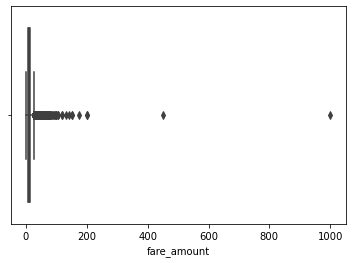

In [496]:
sns.boxplot(df['fare_amount'])

fare_amount has more outliers that are extreme that can be imputed

In [497]:
fare_IQR=df.fare_amount.quantile(0.75)-df.fare_amount.quantile(0.25)
df[df.fare_amount>(df.fare_amount.quantile(0.75)+fare_IQR*1.5)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
6,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.50,1.0,0.5,9.86,0.00,0.3,59.16
11,2,03/05/2017 7:15:30 PM,03/05/2017 7:52:18 PM,2,18.90,2,N,236,132,1,52.00,0.0,0.5,14.58,5.54,0.3,72.92
21,2,10/11/2017 12:34:49 PM,10/11/2017 1:22:38 PM,1,12.30,5,N,138,265,1,68.25,0.0,0.0,12.00,16.26,0.3,96.81
29,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
32,2,07/26/2017 11:26:50 PM,07/26/2017 11:55:49 PM,1,14.32,1,N,132,149,2,40.50,0.5,0.5,0.00,0.00,0.3,41.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,1,07/10/2017 10:56:44 PM,07/10/2017 11:25:16 PM,1,7.90,1,N,249,41,1,27.50,0.5,0.5,2.00,0.00,0.3,30.80
22668,2,02/22/2017 6:45:04 AM,02/22/2017 7:19:34 AM,5,25.30,1,N,181,132,1,67.50,0.0,0.5,17.08,0.00,0.3,87.33
22676,2,12/14/2017 12:21:01 PM,12/14/2017 12:56:21 PM,1,9.47,1,N,138,263,1,32.00,0.0,0.5,6.00,5.76,0.3,44.56
22686,2,02/08/2017 6:13:26 PM,02/08/2017 7:34:11 PM,5,10.64,1,N,170,70,1,52.00,1.0,0.5,14.84,5.54,0.3,74.18


In [498]:
df[df.fare_amount>(df.fare_amount.quantile(0.75)+fare_IQR*6)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
21,2,10/11/2017 12:34:49 PM,10/11/2017 1:22:38 PM,1,12.30,5,N,138,265,1,68.25,0.0,0.0,12.00,16.26,0.3,96.81
29,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
174,1,06/22/2017 2:22:05 PM,06/22/2017 4:07:28 PM,1,16.90,1,N,230,219,2,71.50,0.0,0.5,0.00,0.00,0.3,72.30
176,2,06/13/2017 8:05:03 PM,06/13/2017 8:42:53 PM,1,18.05,3,N,163,1,2,69.50,0.5,0.0,0.00,10.50,0.3,80.80
316,2,07/20/2017 1:21:55 PM,07/20/2017 2:21:20 PM,1,17.86,3,N,170,1,1,78.00,0.0,0.0,0.00,16.50,0.3,94.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,2,04/18/2017 11:43:44 AM,04/18/2017 12:33:04 PM,2,24.61,1,N,132,132,2,66.50,0.0,0.5,0.00,0.00,0.3,67.30
20312,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
20545,1,08/24/2017 1:03:49 PM,08/24/2017 1:49:05 PM,1,27.20,1,N,132,54,1,73.00,0.0,0.5,14.75,0.00,0.3,88.55
20612,2,08/08/2017 9:01:00 PM,08/08/2017 9:40:04 PM,1,27.88,1,N,132,181,1,73.00,0.5,0.5,14.86,0.00,0.3,89.16


In [499]:
for i in range(len(df)):
    if df.trip_distance[i]==0:
                        df.fare_amount[i]=0
                        df.total_amount[i]=0
                        
                        

/var/folders/db/5lq6wtyx2y39rtvf97mrmwfm0000gn/T/ipykernel_57844/2005543009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fare_amount[i]=0
/var/folders/db/5lq6wtyx2y39rtvf97mrmwfm0000gn/T/ipykernel_57844/2005543009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_amount[i]=0


In [500]:
df[df.fare_amount>(df.fare_amount.quantile(0.75)+fare_IQR*6)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
21,2,10/11/2017 12:34:49 PM,10/11/2017 1:22:38 PM,1,12.30,5,N,138,265,1,68.25,0.0,0.0,12.00,16.26,0.3,96.81
29,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
174,1,06/22/2017 2:22:05 PM,06/22/2017 4:07:28 PM,1,16.90,1,N,230,219,2,71.50,0.0,0.5,0.00,0.00,0.3,72.30
176,2,06/13/2017 8:05:03 PM,06/13/2017 8:42:53 PM,1,18.05,3,N,163,1,2,69.50,0.5,0.0,0.00,10.50,0.3,80.80
316,2,07/20/2017 1:21:55 PM,07/20/2017 2:21:20 PM,1,17.86,3,N,170,1,1,78.00,0.0,0.0,0.00,16.50,0.3,94.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19629,2,01/07/2017 8:56:52 AM,01/07/2017 9:10:38 AM,2,11.32,5,N,70,132,1,94.20,0.0,0.5,0.00,0.00,0.3,95.00
19878,2,04/18/2017 11:43:44 AM,04/18/2017 12:33:04 PM,2,24.61,1,N,132,132,2,66.50,0.0,0.5,0.00,0.00,0.3,67.30
20545,1,08/24/2017 1:03:49 PM,08/24/2017 1:49:05 PM,1,27.20,1,N,132,54,1,73.00,0.0,0.5,14.75,0.00,0.3,88.55
20612,2,08/08/2017 9:01:00 PM,08/08/2017 9:40:04 PM,1,27.88,1,N,132,181,1,73.00,0.5,0.5,14.86,0.00,0.3,89.16


In [501]:
total_fare_replacement=(df.fare_amount.quantile(0.75)+fare_IQR*6)

In [502]:
df.fare_amount=df.fare_amount.apply(lambda x:total_fare_replacement if x>total_fare_replacement else x)

/Users/sumakari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'trip distance in miles')

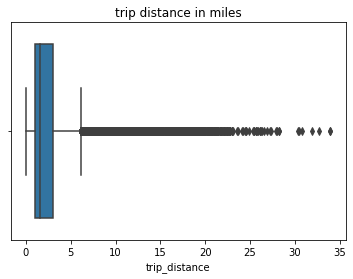

In [503]:
sns.boxplot(df['trip_distance'])
plt.title('trip distance in miles')

In [504]:
df['duration']=(pd.to_datetime(df.tpep_dropoff_datetime)-pd.to_datetime(df.tpep_pickup_datetime))/np.timedelta64(1,'m')

In [505]:
df.duration.unique()

array([  14.06666667,   26.5       ,    7.2       , ...,   36.91666667,
       1438.65      ,   80.75      ])

duration in minutes

In [506]:
df[['duration','fare_amount']].corr()

,duration,fare_amount
duration,1.000000,0.176233
fare_amount,0.176233,1.000000


In [507]:
df.duration.describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

duration cannot be negative it can be zero if trip is cancelled that needs to be fixed

In [508]:
df[df.duration<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
9356,1,11/05/2017 1:23:08 AM,11/05/2017 1:06:09 AM,1,5.7,1,N,161,157,3,28.0,0.5,0.5,0.0,0.0,0.3,29.3,-16.983333


In [509]:
df.duration=df.duration.apply(lambda x:0 if x<0 else x)

In [510]:
df.duration.describe()

count    22699.000000
mean        17.014525
std         61.996174
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

/Users/sumakari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'duration in minutes')

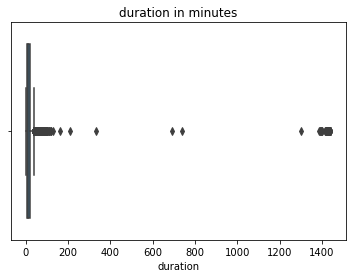

In [511]:
sns.boxplot(df.duration)
plt.title('duration in minutes')

duration has more outliers that are extreme that can be imputed

In [512]:
duration_IQR=df.duration.quantile(0.75)-df.duration.quantile(0.25)
df[df.duration<(df.duration.quantile(0.25)-duration_IQR*1.5)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration


In [513]:
df[df.duration>(df.duration.quantile(0.75)+duration_IQR*1.5)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
6,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16,59.633333
11,2,03/05/2017 7:15:30 PM,03/05/2017 7:52:18 PM,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000
21,2,10/11/2017 12:34:49 PM,10/11/2017 1:22:38 PM,1,12.30,5,N,138,265,1,62.5,0.0,0.0,12.00,16.26,0.3,96.81,47.816667
29,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,62.5,0.5,0.5,18.56,11.52,0.3,111.38,209.166667
47,2,01/13/2017 2:37:24 AM,01/13/2017 3:17:34 AM,4,8.69,1,N,246,231,1,31.5,0.5,0.5,6.56,0.00,0.3,39.36,40.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22620,2,06/19/2017 8:24:09 PM,06/19/2017 9:01:04 PM,3,20.96,2,N,132,261,1,52.0,0.0,0.5,5.50,0.00,0.3,58.30,36.916667
22638,2,04/03/2017 9:02:49 PM,04/04/2017 9:01:28 PM,1,1.73,1,N,107,249,2,9.0,0.5,0.5,0.00,0.00,0.3,10.30,1438.650000
22641,2,12/07/2017 5:48:05 PM,12/07/2017 6:31:56 PM,2,7.03,1,N,237,66,2,29.5,1.0,0.5,0.00,0.00,0.3,31.30,43.850000
22686,2,02/08/2017 6:13:26 PM,02/08/2017 7:34:11 PM,5,10.64,1,N,170,70,1,52.0,1.0,0.5,14.84,5.54,0.3,74.18,80.750000


In [514]:
df.duration.quantile(0.75)+duration_IQR*1.5

35.983333333333334

In [515]:
df[df.duration>=200].shape

(46, 18)

In [516]:
duration_replacement=df.duration.quantile(0.75)+duration_IQR*4
duration_replacement

65.31666666666666

replacing duration with df.duration.quantile(0.75)+duration_IQR*4 as 1.5 seems way too small for values >= 200

In [517]:
df.duration=df.duration.apply(lambda x:duration_replacement if x>=180 else x)

/Users/sumakari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

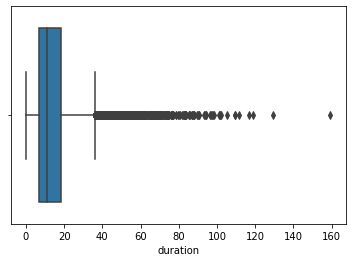

In [518]:
sns.boxplot(df.duration)

In [519]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
VendorID,1.000000,0.266463,0.007782,-0.002991,-0.025236,-0.023098,-0.017787,0.000402,0.001642,-0.008400,-0.000468,0.011122,-0.025610,-0.000936,0.001450
passenger_count,0.266463,1.000000,0.016496,-0.005743,-0.005721,0.000332,0.016178,0.016918,-0.006339,-0.006293,-0.009975,0.009532,-0.001418,0.009390,0.016044
trip_distance,0.007782,0.016496,1.000000,0.153032,-0.080737,-0.093342,-0.044716,0.942667,0.110330,-0.083288,0.502242,0.622857,0.019569,0.802374,0.771970
RatecodeID,-0.002991,-0.005743,0.153032,1.000000,0.003768,0.007020,-0.000982,0.154852,0.019638,-0.199324,0.118044,0.175860,-0.017291,0.165773,0.090613
PULocationID,-0.025236,-0.005721,-0.080737,0.003768,1.000000,0.097142,-0.006449,-0.076840,-0.010923,-0.000755,-0.022284,-0.041886,0.000165,-0.058214,-0.063860
DOLocationID,-0.023098,0.000332,-0.093342,0.007020,0.097142,1.000000,-0.011300,-0.092717,-0.019478,0.027497,-0.034482,-0.033808,0.008885,-0.069718,-0.075265
payment_type,-0.017787,0.016178,-0.044716,-0.000982,-0.006449,-0.011300,1.000000,-0.051378,-0.024838,-0.077528,-0.445044,-0.041217,-0.101198,-0.120931,-0.040985
fare_amount,0.000402,0.016918,0.942667,0.154852,-0.076840,-0.092717,-0.051378,1.000000,0.100436,-0.100900,0.528140,0.607324,0.035121,0.855898,0.864449
extra,0.001642,-0.006339,0.110330,0.019638,-0.010923,-0.019478,-0.024838,0.100436,1.000000,0.050816,0.064483,0.060402,0.040666,0.109926,0.099258
mta_tax,-0.008400,-0.006293,-0.083288,-0.199324,-0.000755,0.027497,-0.077528,-0.100900,0.050816,1.000000,-0.126416,-0.238170,0.628518,-0.158118,-0.030333


fare amount depends on trip_distance and duration based on good positive corelation

trip distance,trip_duration can be found before trip ends hand but we can use mean data values from prevoius data to use in model

In [520]:
df['pick_drop']=df['PULocationID'].astype('str')+' '+df['DOLocationID'].astype('str')

In [521]:
df.pick_drop.value_counts()

264 264    277
237 236    124
236 236    110
236 237    102
237 237     96
          ... 
66 162       1
79 116       1
166 1        1
164 224      1
249 17       1
Name: pick_drop, Length: 4172, dtype: int64

In [522]:
mean_distance=df.groupby('pick_drop').mean(numeric_only=True)[['trip_distance']]

In [523]:
mean_distance=mean_distance.to_dict()

In [524]:
mean_distance

{'trip_distance': {'1 1': 2.433333333333333,
  '10 148': 15.7,
  '100 1': 16.89,
  '100 100': 0.25333333333333335,
  '100 107': 1.18,
  '100 113': 2.024,
  '100 114': 1.94,
  '100 12': 4.55,
  '100 125': 2.84,
  '100 13': 4.201666666666667,
  '100 132': 17.2175,
  '100 137': 1.299,
  '100 138': 10.432857142857143,
  '100 140': 2.746,
  '100 141': 2.11,
  '100 142': 1.6958333333333335,
  '100 143': 1.5825,
  '100 144': 3.0066666666666664,
  '100 148': 4.1066666666666665,
  '100 151': 3.668,
  '100 152': 4.9,
  '100 158': 1.938,
  '100 161': 0.9813888888888889,
  '100 162': 1.2163636363636363,
  '100 163': 1.2656,
  '100 164': 0.841,
  '100 166': 5.199999999999999,
  '100 170': 0.8548,
  '100 177': 12.0,
  '100 181': 9.34,
  '100 186': 0.6404761904761904,
  '100 193': 4.39,
  '100 198': 9.01,
  '100 202': 5.3,
  '100 209': 4.43,
  '100 211': 2.48,
  '100 224': 1.9500000000000002,
  '100 225': 7.5,
  '100 229': 1.7850000000000001,
  '100 230': 0.72975,
  '100 231': 3.5216666666666665,
  '

In [525]:
mean_distance=mean_distance['trip_distance']

In [526]:
mean_distance

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

In [527]:
df['mean_distance']=df['pick_drop']

In [528]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pick_drop,mean_distance
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,100 231
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,186 43
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,262 236
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,188 97
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4 112


In [529]:
df['mean_distance']=df['mean_distance'].map(mean_distance)

In [530]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pick_drop,mean_distance
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000


In [531]:
mean_duration=df.groupby('pick_drop').mean(numeric_only=True)[['duration']]

In [532]:
mean_duration=mean_duration['duration']

In [533]:
df['mean_duration']=df['pick_drop']

In [534]:
df['mean_duration']=df['mean_duration'].map(mean_duration)

In [535]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pick_drop,mean_distance,mean_duration
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,...,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,...,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,...,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,...,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,...,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667


In [536]:
model_data=df[['VendorID','passenger_count','mean_distance','mean_duration','fare_amount']]

removed unnecessary columns

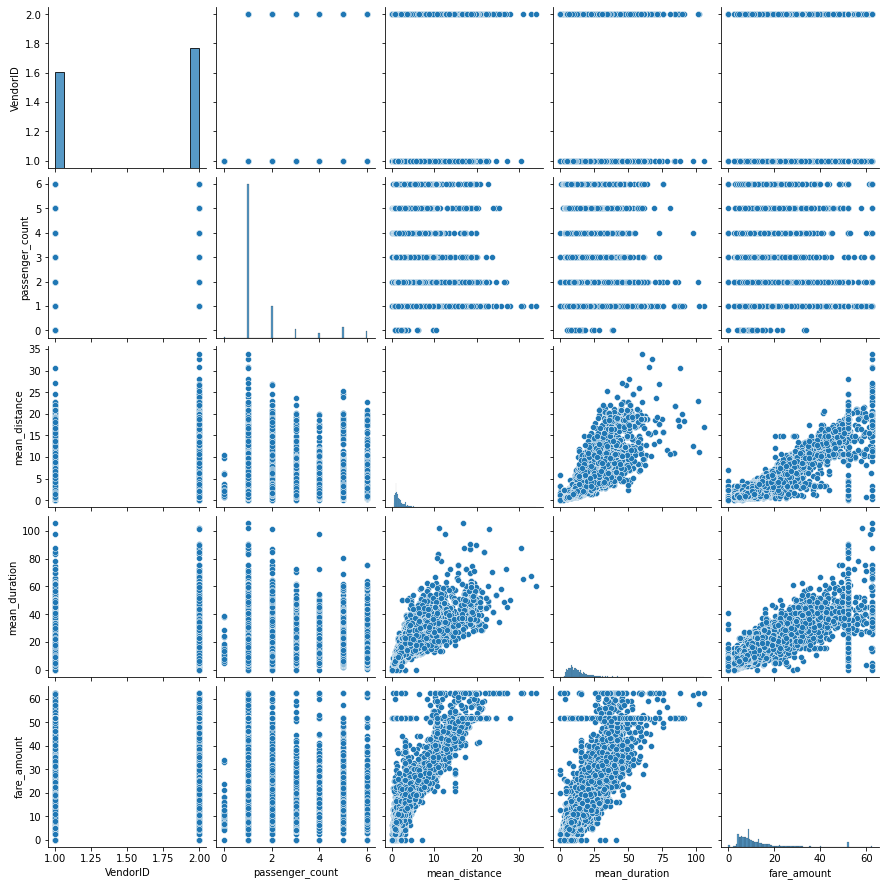

In [537]:
sns.pairplot(model_data)

<AxesSubplot:>

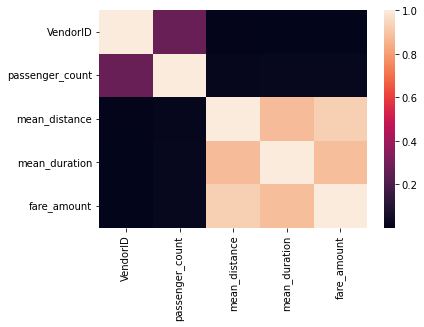

In [538]:
sns.heatmap(model_data.corr())

In [539]:
model_data.corr()

,VendorID,passenger_count,mean_distance,mean_duration,fare_amount
VendorID,1.000000,0.266463,0.004741,0.001953,0.000402
passenger_count,0.266463,1.000000,0.013428,0.016075,0.016918
mean_distance,0.004741,0.013428,1.000000,0.875984,0.925762
mean_duration,0.001953,0.016075,0.875984,1.000000,0.880070
fare_amount,0.000402,0.016918,0.925762,0.880070,1.000000


In [540]:
X=model_data.drop(columns=['fare_amount'])
Y=model_data.fare_amount

In [541]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [542]:
model_data['VendorID']=model_data['VendorID'].astype('str')

/var/folders/db/5lq6wtyx2y39rtvf97mrmwfm0000gn/T/ipykernel_57844/2466148924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['VendorID']=model_data['VendorID'].astype('str')


In [543]:
model_data=pd.get_dummies(model_data,drop_first=True) #hot encoding of categorical variables

In [544]:
model_data

,passenger_count,mean_distance,mean_duration,fare_amount,VendorID_2
0,6,3.521667,22.847222,13.0,1
1,1,3.108889,24.470370,16.0,0
2,1,0.881429,7.250000,6.5,0
3,1,3.700000,30.250000,20.5,1
4,1,4.435000,14.616667,16.5,1
...,...,...,...,...,...
22694,3,1.098214,8.594643,4.0,1
22695,1,18.757500,59.560417,52.0,1
22696,1,0.684242,6.609091,4.5,1
22697,1,2.077500,16.650000,10.5,1


In [545]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)#Standardizing data

In [546]:
lr=LinearRegression()

In [547]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [548]:

y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
#Evaluation of model

R^2: 0.882211200593308
MSE: 12.620239877773386


with test data below

In [549]:
X_test_scaled = scaler.transform(X_test)

In [550]:

y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))

print('MSE:', mean_squared_error(y_test, y_pred_test))


R^2: 0.8673193990765902
MSE: 14.99774283658565


he model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R2 of 0.868 means that 86.8% of the variance in the fare_amount variable is described by the model.